In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [3]:
temp = temp[:365]
temp.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
temp['3DMA'] = temp['Temp'].rolling(window = 3).mean()
temp['7DMA'] = temp['Temp'].rolling(window = 7).mean()
temp['30DMA'] = temp['Temp'].rolling(window = 30).mean()
temp.head()

,Date,Temp,3DMA,7DMA,30DMA
0,1981-01-01,20.7,NaN,NaN,NaN
1,1981-01-02,17.9,NaN,NaN,NaN
2,1981-01-03,18.8,19.133333,NaN,NaN
3,1981-01-04,14.6,17.100000,NaN,NaN
4,1981-01-05,15.8,16.400000,NaN,NaN


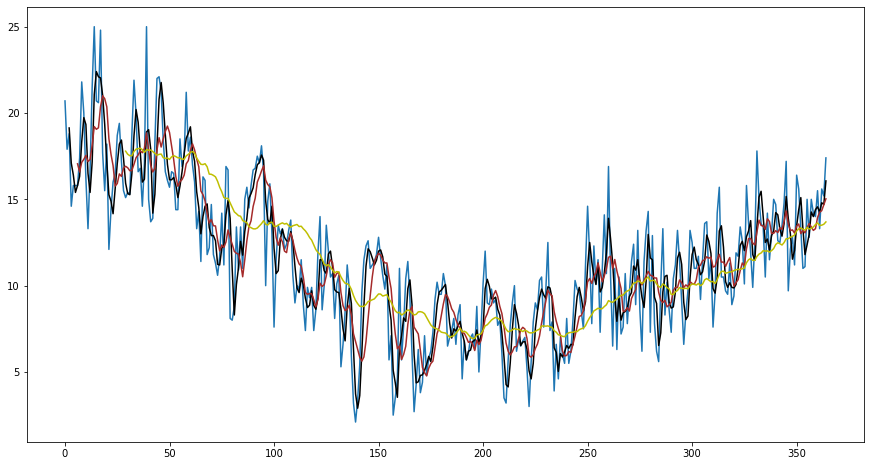

In [6]:
plt.figure(figsize = (15,8))
plt.plot(temp.Temp)
plt.plot(temp['3DMA'].dropna(),color='black')
plt.plot(temp['7DMA'].dropna(),color='brown')
plt.plot(temp['30DMA'].dropna(),color='y')
plt.show()

In [7]:
#ARMA
#p = AR
#q = MA
from statsmodels.tsa.arima_model import ARMA
X = temp.Temp
train = X[1:350]
test = X[350:]
model = ARMA(train, order=(0,3)).fit()

In [8]:
preds=model.predict(349,363)
preds

350    12.205502
351    11.326862
352    11.144641
353    11.390510
354    11.390510
355    11.390510
356    11.390510
357    11.390510
358    11.390510
359    11.390510
360    11.390510
361    11.390510
362    11.390510
363    11.390510
364    11.390510
dtype: float64

In [9]:
#mse
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = mean_squared_error(test,preds)
error

11.490815554830696

In [10]:
error = mean_absolute_error(test,preds)
error

3.0265945362946867

#### Can you measure MAPE ?

In [11]:
model = ARMA(train, order=(2,3)).fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
ARMA
ARIMA

Test - Dickey Fuller's Test. This tells us if the TS is stationary or not.

1. We need to check idf our TS is stationary or not
2. If not stationary we need to make the TS Stationary
3. Build the model

#### Dickey Fuller's Tests

In [13]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

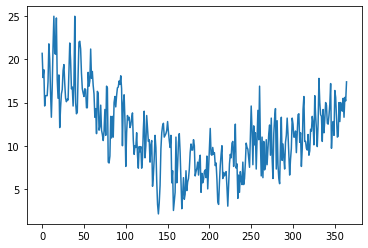

In [14]:
temp = temp[:365]
plt.plot(temp['Temp'])

In [16]:
#checking the mean and std dev for a 10 day window
print("Mean : ",temp['Temp'][:10].mean())
print("Standard Deviation : ",temp['Temp'][:10].std())

Mean :  17.86
Standard Deviation :  2.4180800464647794


In [17]:
print("Mean : ",temp['Temp'][10:20].mean())
print("Standard Deviation : ",temp['Temp'][10:20].std())

Mean :  19.2
Standard Deviation :  3.9510898637098992


In [19]:
print("Mean : ",temp['Temp'][20:30].mean())
print("Standard Deviation : ",temp['Temp'][20:30].std())

Mean :  16.309999999999995
Standard Deviation :  2.1921323966504493


In [20]:
print("Mean : ",temp['Temp'][300:310].mean())
print("Standard Deviation : ",temp['Temp'][300:310].std())

Mean :  11.610000000000001
Standard Deviation :  1.3811830677599064


In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adfuller(temp['Temp'])

(-2.4549518801166084,
 0.12682316388801912,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 1607.4780885337195)

In [31]:
#Augumented Dickey fullers's Test
#used to check the stationrity of time series

#Null Hypothesis : It is not stationary
#Alternate Hyppothesis : It is stationary

#thresholp p-value = 0.05 (significance level)
# p-value < 0.05, reject the null hypothesis and the time series is stationary

def adfuller_test(val):
    
    result = adfuller(val)
    labels = ['ADF Test Statistics', 'p-value', 'Lags', 'NUmber of observations']
    
    for value, label in zip(result,labels):
        
        print(label + ' : ' + str(value))
        
    if result[1] < 0.05:
        
        print("Strong evidence against the Null Hypothesis, reject the null hypothesis. Time series is stationary")
        
    else:
        
        print("Weak evidence against the Null Hypothesis,cannot reject the null hypothesis. Time series is non stationary")    

In [32]:
adfuller_test(temp['Temp'])

ADF Test Statistics : -2.4549518801166084
p-value : 0.12682316388801912
Lags : 6
NUmber of observations : 358
Weak evidence against the Null Hypothesis,cannot reject the null hypothesis. Time series is non stationary


In [33]:
#Tramsformation to induce stationarity

# 1. Differencing
# 2. Square root
# 3. Cube root
# 4. Log values

In [34]:
#differencing
temp['1st differencing'] = temp['Temp'] - temp['Temp'].shift(1)
temp

,Date,Temp,1st differencing
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,-2.8
2,1981-01-03,18.8,0.9
3,1981-01-04,14.6,-4.2
4,1981-01-05,15.8,1.2
...,...,...,...
360,1981-12-27,15.5,1.5
361,1981-12-28,13.3,-2.2
362,1981-12-29,15.6,2.3
363,1981-12-30,15.2,-0.4


In [35]:
adfuller_test(temp['1st differencing'].dropna())

ADF Test Statistics : -7.558332159146307
p-value : 3.057032885854083e-11
Lags : 17
NUmber of observations : 346
Strong evidence against the Null Hypothesis, reject the null hypothesis. Time series is stationary


In [36]:
#2nd differencing
temp['2nd differencing'] = temp['1st differencing'] - temp['1st differencing'].shift(1)
temp

,Date,Temp,1st differencing,2nd differencing
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,-2.8,NaN
2,1981-01-03,18.8,0.9,3.7
3,1981-01-04,14.6,-4.2,-5.1
4,1981-01-05,15.8,1.2,5.4
...,...,...,...,...
360,1981-12-27,15.5,1.5,1.7
361,1981-12-28,13.3,-2.2,-3.7
362,1981-12-29,15.6,2.3,4.5
363,1981-12-30,15.2,-0.4,-2.7


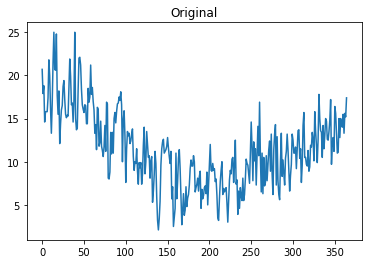

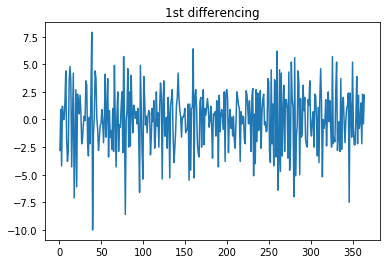

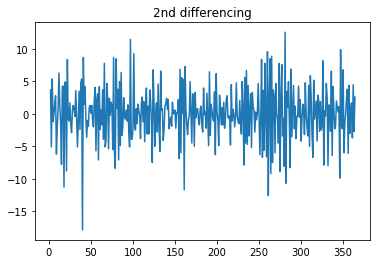

In [37]:
plt.plot(temp.Temp)
plt.title('Original')
plt.show()

plt.plot(temp['1st differencing'].dropna())
plt.title('1st differencing')
plt.show()

plt.plot(temp['2nd differencing'].dropna())
plt.title('2nd differencing')
plt.show()

In [39]:
from statsmodels.tsa.arima_model import ARMA

train = temp['1st differencing'][1:350]
test = temp['1st differencing'][350:]

model = ARMA(train, order=(2,3)).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st differencing   No. Observations:                  349
Model:                     ARMA(2, 3)   Log Likelihood                -805.062
Method:                       css-mle   S.D. of innovations              2.426
Date:                Sun, 03 Oct 2021   AIC                           1624.124
Time:                        11:58:36   BIC                           1651.109
Sample:                             0   HQIC                          1634.866
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0164      0.020     -0.832      0.406      -0.055       0.022
ar.L1.1st differencing    -0.3203      0.334     -0.959      0.338      -0.975       0.334
ar.L2.1st differencing     0.3195      0.131      2.435      0.015       0.062       0.577
ma.L1.1st differencing    -0.1176      0.337     -0.349      0.727      -0.777       0.542
ma.L2.1st differencing    -0.7311      0.209     -3.503      0.000      -1.140      -0.322
ma.L3.1st differencing    -0.0040      0.131     -0.031      0.976      -0.261       0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3376           +0.0000j            1.3376            0.5000
AR.2            2.3403           +0.0000j            2.3403            0.0000
MA.1            1.0888           +0.0000j            1.0888            0.0000
MA.2           -1.2574           +0.0000j            1.2574            0.5000
MA.3         -181.7187           +0.0000j          181.7187            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
y = -0.32(y(t-1)) + 0.31(y(t-2)) - 0.117(1DMA) - 0.73(2DMA) - 0.0040(3DMA) -0.0164

In [47]:
df_perf = []

for p in range(5):
    for q in range(3):
        
        model = ARMA(train, order=(p,q)).fit()
        preds = model.predict(349,363)
        
        df_perf.append([p,q,mean_squared_error(test, preds), mean_absolute_error(test,preds)])

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [49]:
pd.DataFrame(df_perf, columns = ['AR(p)','MA(q)','MSE',"MAE"])

,AR(p),MA(q),MSE,MAE
0,0,0,5.437910,1.904852
1,0,1,4.955116,1.856203
2,0,2,4.902328,1.877830
3,1,0,5.183909,1.875577
4,1,1,5.075613,1.892268
5,1,2,5.092099,1.898764
6,2,0,5.223898,1.890301
7,2,1,5.090626,1.898478
8,2,2,4.993442,1.875571
9,3,0,5.539479,1.939041


In [52]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
#ARIMA -Autoregression Integrated Moving averages

#p - Auto Regression
#d - differencing
#q - Moving averages part

model = ARIMA(temp['Temp'], order=(5,1,2)).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Temp   No. Observations:                  364
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -836.729
Method:                       css-mle   S.D. of innovations              2.407
Date:                Sun, 03 Oct 2021   AIC                           1691.458
Time:                        12:56:23   BIC                           1726.532
Sample:                             1   HQIC                          1705.398
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0107      0.020     -0.537      0.591      -0.050       0.028
ar.L1.D.Temp    -0.1566      0.338     -0.464      0.643      -0.819       0.506
ar.L2.D.Temp     0.2469      0.163      1.516      0.130      -0.072       0.566
ar.L3.D.Temp    -0.0090      0.061     -0.147      0.883      -0.129       0.111
ar.L4.D.Temp    -0.0348      0.059     -0.590      0.555      -0.150       0.081
ar.L5.D.Temp     0.0510      0.063      0.812      0.417      -0.072       0.174
ma.L1.D.Temp    -0.2838      0.335     -0.846      0.397      -0.941       0.373
ma.L2.D.Temp    -0.5776      0.301     -1.918      0.055      -1.168       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4378           -0.6897j            1.5947           -0.4288
AR.2           -1.4378           +0.6897j            1.5947            0.4288
AR.3            1.7737           -0.0000j            1.7737           -0.0000
AR.4            0.8920           -1.8847j            2.0851           -0.1796
AR.5            0.8920           +1.8847j            2.0851            0.1796
MA.1            1.0928           +0.0000j            1.0928            0.0000
MA.2           -1.5842           +0.0000j            1.5842            0.5000
-----------------------------------------------------------------------------
"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv')
df.columns = ['value']
df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


In [9]:
df.shape

(100, 1)

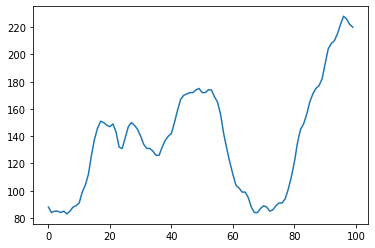

In [10]:
plt.plot(df.value)
plt.show()

In [13]:
def adfuller_test(val):
    
    result = adfuller(val)
    labels = ['ADF Test Statistics', 'p-value', 'Lags', 'NUmber of observations']
    
    for value, label in zip(result,labels):
        
        print(label + ' : ' + str(value))
        
    if result[1] < 0.05:
        
        print("Strong evidence against the Null Hypothesis, reject the null hypothesis. Time series is stationary")
        
    else:
        
        print("Weak evidence against the Null Hypothesis,cannot reject the null hypothesis. Time series is non stationary")    

In [14]:
adfuller_test(df.value)

ADF Test Statistics : -2.464239717203369
p-value : 0.12441935447109442
Lags : 3
NUmber of observations : 96
Weak evidence against the Null Hypothesis,cannot reject the null hypothesis. Time series is non stationary


In [15]:
#differencing
df['1st differencing'] = df['value'] - df['value'].shift(1)
df

,value,1st differencing
0,88,NaN
1,84,-4.0
2,85,1.0
3,85,0.0
4,84,-1.0
...,...,...
95,222,7.0
96,228,6.0
97,226,-2.0
98,222,-4.0


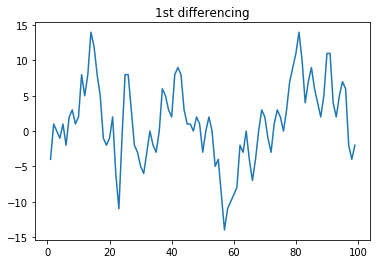

In [16]:
plt.plot(df['1st differencing'].dropna())
plt.title('1st differencing')
plt.show()

In [17]:
adfuller_test(df['1st differencing'].dropna())

ADF Test Statistics : -2.722238490442951
p-value : 0.07026846015272728
Lags : 2
NUmber of observations : 96
Weak evidence against the Null Hypothesis,cannot reject the null hypothesis. Time series is non stationary


In [18]:
#2nd differencing
df['2nd differencing'] = df['1st differencing'] - df['1st differencing'].shift(1)
df

,value,1st differencing,2nd differencing
0,88,NaN,NaN
1,84,-4.0,NaN
2,85,1.0,5.0
3,85,0.0,-1.0
4,84,-1.0,-1.0
...,...,...,...
95,222,7.0,2.0
96,228,6.0,-1.0
97,226,-2.0,-8.0
98,222,-4.0,-2.0


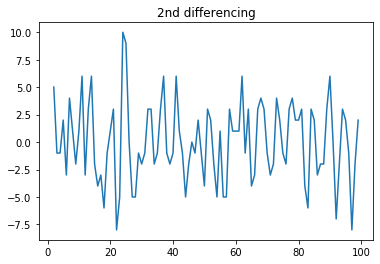

In [19]:
plt.plot(df['2nd differencing'].dropna())
plt.title('2nd differencing')
plt.show()

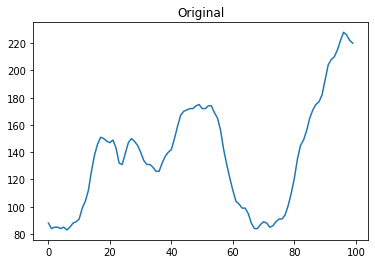

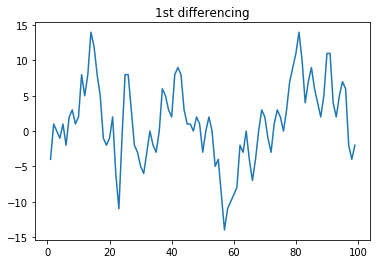

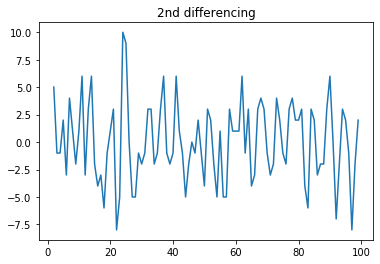

In [20]:
plt.plot(df.value)
plt.title("Original")
plt.show()

plt.plot(df['1st differencing'].dropna())
plt.title('1st differencing')
plt.show()

plt.plot(df['2nd differencing'].dropna())
plt.title('2nd differencing')
plt.show()

In [21]:
adfuller_test(df['2nd differencing'].dropna())

ADF Test Statistics : -9.929762173626017
p-value : 2.8434287555470966e-17
Lags : 1
NUmber of observations : 96
Strong evidence against the Null Hypothesis, reject the null hypothesis. Time series is stationary


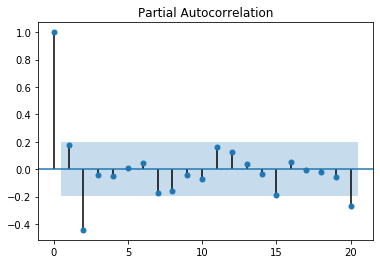

In [25]:
plot_pacf(df['2nd differencing'].dropna()) # guess the p(AR)
plt.show()

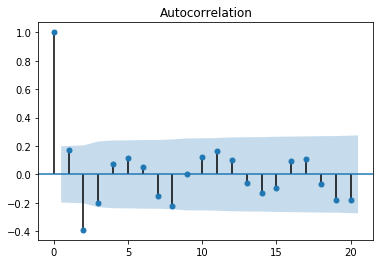

In [26]:
plot_acf(df['2nd differencing'].dropna()) # used to guess the moving averages part
plt.show()

In [27]:
X = df.value

In [28]:
train = X[:90]
test = X[90:]

In [30]:
model = ARIMA(train, order=(1,2,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.value   No. Observations:                   88
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -231.668
Method:                       css-mle   S.D. of innovations              3.363
Date:                Sun, 03 Oct 2021   AIC                            471.337
Time:                        13:12:16   BIC                            481.246
Sample:                             2   HQIC                           475.329
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1240      0.443      0.280      0.780      -0.745       0.993
ar.L1.D2.value    -0.2930      0.205     -1.426      0.154      -0.696       0.110
ma.L1.D2.value     0.6017      0.159      3.781      0.000       0.290       0.914
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.4126           +0.0000j            3.4126            0.5000
MA.1           -1.6621           +0.0000j            1.6621            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
preds,error,conf = model.forecast(10)

In [32]:
preds

array([188.34238727, 194.45174365, 200.78971308, 207.22102029,
       213.78530493, 220.47095139, 227.2813634 , 234.21554357,
       241.27378415, 248.45599952])

In [33]:
preds = pd.Series(preds,index=test.index)
preds

90    188.342387
91    194.451744
92    200.789713
93    207.221020
94    213.785305
95    220.470951
96    227.281363
97    234.215544
98    241.273784
99    248.456000
dtype: float64

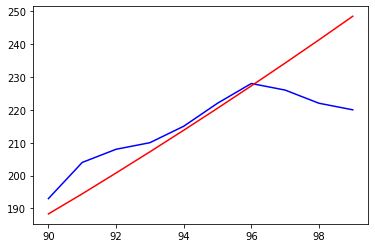

In [34]:
plt.plot(test, color = 'blue')
plt.plot(preds, color = 'red')
plt.show()

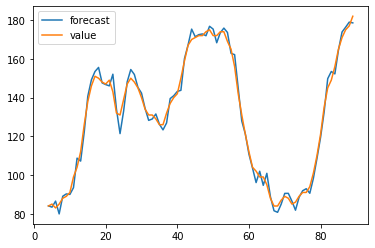

In [35]:
model.plot_predict()
plt.show()